In [1]:
%autosave 60

Autosaving every 60 seconds


# Import

In [2]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


plt.rcParams['figure.figsize'] = [11, 3]
plt.rcParams['figure.dpi'] = 200 # 200 e.g. is really fine, but slower

In [3]:
nat = pd.read_csv('nat2018.csv', sep=';')
nat.sample(10).head(10)

,sexe,preusuel,annais,nombre
217964,1,PIER,1992,4
252624,1,STANISLAV,2003,3
437197,2,JESSY,2010,45
524418,2,MELISENDE,XXXX,18
237894,1,SAINT-CYR,1924,3
347043,2,CHARLEE,2018,10
333548,2,BERTHE,1938,354
347846,2,CHARLYNE,1993,72
218514,1,PIERRE-ALIX,XXXX,30
470452,2,LINOA,2011,50


# Nettoyage

## On enlève les 'XXXX'

In [4]:
print(f'nat avant : {nat.shape}')
nat = nat[nat.annais != 'XXXX']
print(f'nat après : {nat.shape}')

nat avant : (636474, 4)
nat après : (601461, 4)


## On calcule les proportion par année et sexe pour chaque prénom

In [5]:
# proportion des naissances avec un prenom par rapport a la somme des naissance pour cette année et ce sexe

def add_prop(group):
    group['prop'] = group.nombre / group.nombre.sum()
    
    return group

nat = nat.groupby(['annais', 'sexe']).apply(add_prop)
nat

,sexe,preusuel,annais,nombre,prop
0,1,A,1980,3,0.000007
1,1,A,1998,3,0.000008
3,1,AADAM,2009,4,0.000010
4,1,AADAM,2014,3,0.000007
5,1,AADAM,2016,4,0.000010
...,...,...,...,...,...
636468,2,ÖZLEM,2012,6,0.000015
636469,2,ÖZLEM,2013,3,0.000008
636470,2,ÖZLEM,2014,5,0.000013
636471,2,ÖZLEM,2015,3,0.000008


# Exercice Sanity check

## Automatize sanity check let's compute total births in the max proportion year / total births

In [6]:
# display the max proportion
max_prop_line = nat.sort_values(by='prop')[-1:]
max_prop_line

,sexe,preusuel,annais,nombre,prop
499325,2,MARIE,1900,48713,0.204978


In [7]:
# get the year with the max proportion
year = max_prop_line.annais.iloc[0]
# get the name with the max proportion
name = max_prop_line.preusuel.iloc[0]
# get the sexe with the max proportion
sexe = max_prop_line.sexe.iloc[0]
# get the proportion itself with the max proportion
max_prop = max_prop_line.prop.iloc[0]
print(f'The maximum proportion computed is {max_prop} for {name} in {year}.')

The maximum proportion computed is 0.2049779086892489 for MARIE in 1900.


In [8]:
# do the sanity check
mask = (nat.annais == year) & (nat.sexe == sexe)
# number of births in annais {year} and sexe {sexe}
n_birth = nat[mask].nombre.sum()
# number of births for the preusuel {name} in annais {year} and sexe {sexe}
n_name = nat[mask & (nat.preusuel == name)].nombre.sum()
print(f'There are in {n_name} {name} in {year} for a total of {n_birth} births for {"boys" if sexe == 1 else "girls"}')
sanity_prop = n_name / n_birth
print(f'It corresponds to a proportion of {sanity_prop} :\033[1m TEST {"NOT " if (sanity_prop != max_prop) else ""}PASSED !')

There are in 48713 MARIE in 1900 for a total of 237650 births for girls
It corresponds to a proportion of 0.2049779086892489 : TEST PASSED !


## Same for min

In [9]:
# display the min proportion
min_prop_line = nat.sort_values(by='prop')[:1]
min_prop_line

,sexe,preusuel,annais,nombre,prop
87754,1,FLOREAL,1971,3,0.000006


In [10]:
# get the year with the min proportion
year = min_prop_line.annais.iloc[0]
# get the name with the min proportion
name = min_prop_line.preusuel.iloc[0]
# get the sexe with the min proportion
sexe = min_prop_line.sexe.iloc[0]
# get the proportion itself with the min proportion
min_prop = min_prop_line.prop.iloc[0]
print(f'The minimum proportion computed is {min_prop} for {name} in {year}.')

# do the sanity check
mask = (nat.annais == year) & (nat.sexe == sexe)
# number of births in annais {year} and sexe {sexe}
n_birth = nat[mask].nombre.sum()
# number of births for the preusuel {name} in annais {year} and sexe {sexe}
n_name = nat[mask & (nat.preusuel == name)].nombre.sum()
print(f'\nThere are in {n_name} {name} in {year} for a total of {n_birth} births for {"boys" if sexe == 1 else "girls"}')
sanity_prop = n_name / n_birth
print(f'It corresponds to a proportion of {sanity_prop} :\033[1m TEST {"NOT " if (sanity_prop != min_prop) else ""}PASSED !')

The minimum proportion computed is 6.442883834804459e-06 for FLOREAL in 1971.

There are in 3 FLOREAL in 1971 for a total of 465630 births for boys
It corresponds to a proportion of 6.442883834804459e-06 : TEST PASSED !


## Verify that total nb of boys lines = total nb of lines in dataframe - total number of girls lines

In [11]:
boys = nat[(nat.sexe==1) & (nat.preusuel!="_PRENOMS_RARES")]
boys.sample(10).head(10)

,sexe,preusuel,annais,nombre,prop
213517,1,PABLITO,1958,3,0.000007
145800,1,JULES-HENRI,1962,4,0.000009
278954,1,YAKIN,2006,5,0.000012
110352,1,HEIDI,1984,10,0.000025
63622,1,DJANY,2018,13,0.000034
82726,1,FABIEN,1954,220,0.000513
92721,1,FRÉDÉRIK,1984,4,0.000010
28408,1,ARYAN,2005,5,0.000012
233001,1,ROMUALD,1924,10,0.000033
126946,1,JARNO,1975,3,0.000008


In [12]:
n_line_boys = boys.shape[0]
print(f'There are {n_line_boys} lines for the boys (without rare firstnames)')

There are 273864 lines for the boys (without rare firstnames)


In [13]:
# do the sanity check
n_line = nat[(nat.preusuel != '_PRENOMS_RARES')].shape[0]  # number of lines
n_line_girls = nat[(nat.sexe == 2) & (nat.preusuel != '_PRENOMS_RARES')].shape[0]  # number of lines for the girls
print(f'There are {n_line_girls} in a {n_line}-lines dataset')
sanity_n_line_boys = n_line - n_line_girls
print(f'It corresponds to have {sanity_n_line_boys} lines of boys:\033[1m TEST {"NOT " if (sanity_n_line_boys != n_line_boys) else ""}PASSED !')

There are 327359 in a 601223-lines dataset
It corresponds to have 273864 lines of boys: TEST PASSED !


# Exercice : Combien faut-il de prenoms pour atteindre 50% des prénoms donnés par sexe en fonction du temps ? 

## On applique une somme cumulée à cette proportion par année et par sexe ordonnée en décroissant

In [14]:
nat = nat.sort_values(by=['annais', 'sexe', 'prop'], ascending=[True, True, False])
nat

,sexe,preusuel,annais,nombre,prop
127964,1,JEAN,1900,14097,0.079473
166224,1,LOUIS,1900,9051,0.051025
218135,1,PIERRE,1900,7456,0.042034
142885,1,JOSEPH,1900,7259,0.040923
111225,1,HENRI,1900,6921,0.039017
...,...,...,...,...,...
635327,2,ÂYA,2018,3,0.000008
635725,2,ÉLISSA,2018,3,0.000008
635817,2,ÉLOISE,2018,3,0.000008
636390,2,ÉVE,2018,3,0.000008


In [15]:
nat['cumprop'] = nat.groupby(['annais', 'sexe'])['prop'].cumsum()
nat

,sexe,preusuel,annais,nombre,prop,cumprop
127964,1,JEAN,1900,14097,0.079473,0.079473
166224,1,LOUIS,1900,9051,0.051025,0.130498
218135,1,PIERRE,1900,7456,0.042034,0.172532
142885,1,JOSEPH,1900,7259,0.040923,0.213455
111225,1,HENRI,1900,6921,0.039017,0.252472
...,...,...,...,...,...,...
635327,2,ÂYA,2018,3,0.000008,0.999967
635725,2,ÉLISSA,2018,3,0.000008,0.999975
635817,2,ÉLOISE,2018,3,0.000008,0.999983
636390,2,ÉVE,2018,3,0.000008,0.999992


In [16]:
before50percent = nat[(nat.preusuel != '_PRENOMS_RARES') & (nat.cumprop <= 0.5)]
before50percent

,sexe,preusuel,annais,nombre,prop,cumprop
127964,1,JEAN,1900,14097,0.079473,0.079473
166224,1,LOUIS,1900,9051,0.051025,0.130498
218135,1,PIERRE,1900,7456,0.042034,0.172532
142885,1,JOSEPH,1900,7259,0.040923,0.213455
111225,1,HENRI,1900,6921,0.039017,0.252472
...,...,...,...,...,...,...
534042,2,MYLA,2018,518,0.001444,0.493375
377346,2,ELLA,2018,512,0.001427,0.494802
551472,2,NORA,2018,510,0.001422,0.496224
375891,2,ELINA,2018,502,0.001399,0.497623


In [17]:
table = before50percent.pivot_table('cumprop', index='annais', columns='sexe', aggfunc=len)
table

sexe,1,2
annais,,
1900,13.0,13.0
1901,13.0,13.0
1902,13.0,13.0
1903,13.0,14.0
1904,13.0,14.0
...,...,...
2014,87.0,118.0
2015,88.0,117.0
2016,90.0,118.0


<AxesSubplot:title={'center':'Number of names needed before reaching the 50% proportion of given names by year and sexe'}, xlabel='annais'>

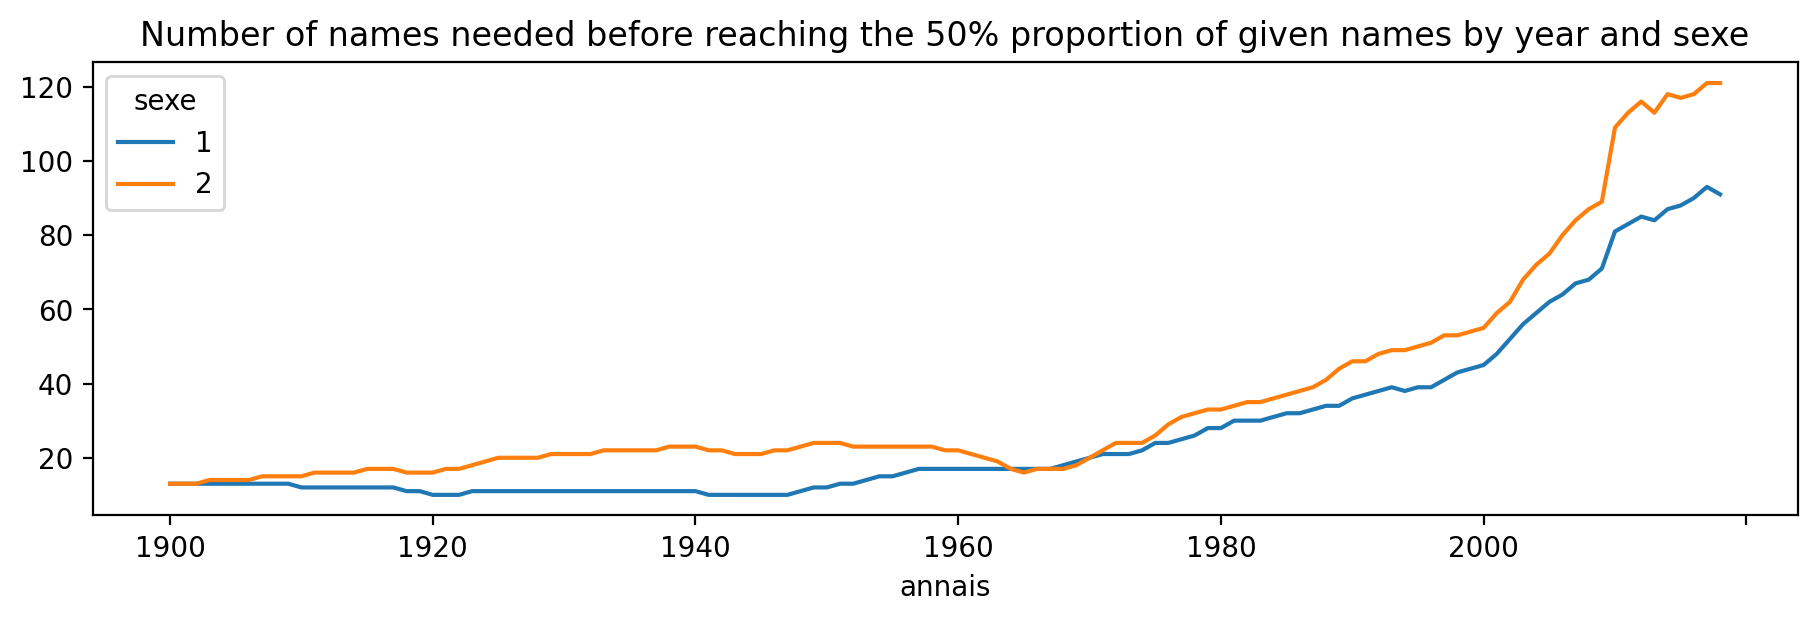

In [18]:
table.plot(title='Number of names needed before reaching the 50% proportion of given names by year and sexe')

In [19]:
def plot_n_name_to_reach_ratio_of_given_names(df, ratio=0.5, keep_rare=True):
    mask = (keep_rare or (df.preusuel != '_PRENOMS_RARES')) & (df.cumprop <= ratio)
    subdf = df[mask]
    table = subdf.pivot_table('cumprop', index='annais', columns='sexe', aggfunc=len)
    title = f'Number of names needed before reaching the {ratio * 100:.0f}% proportion of total given names by year and sexe'
    table.plot(title=title)

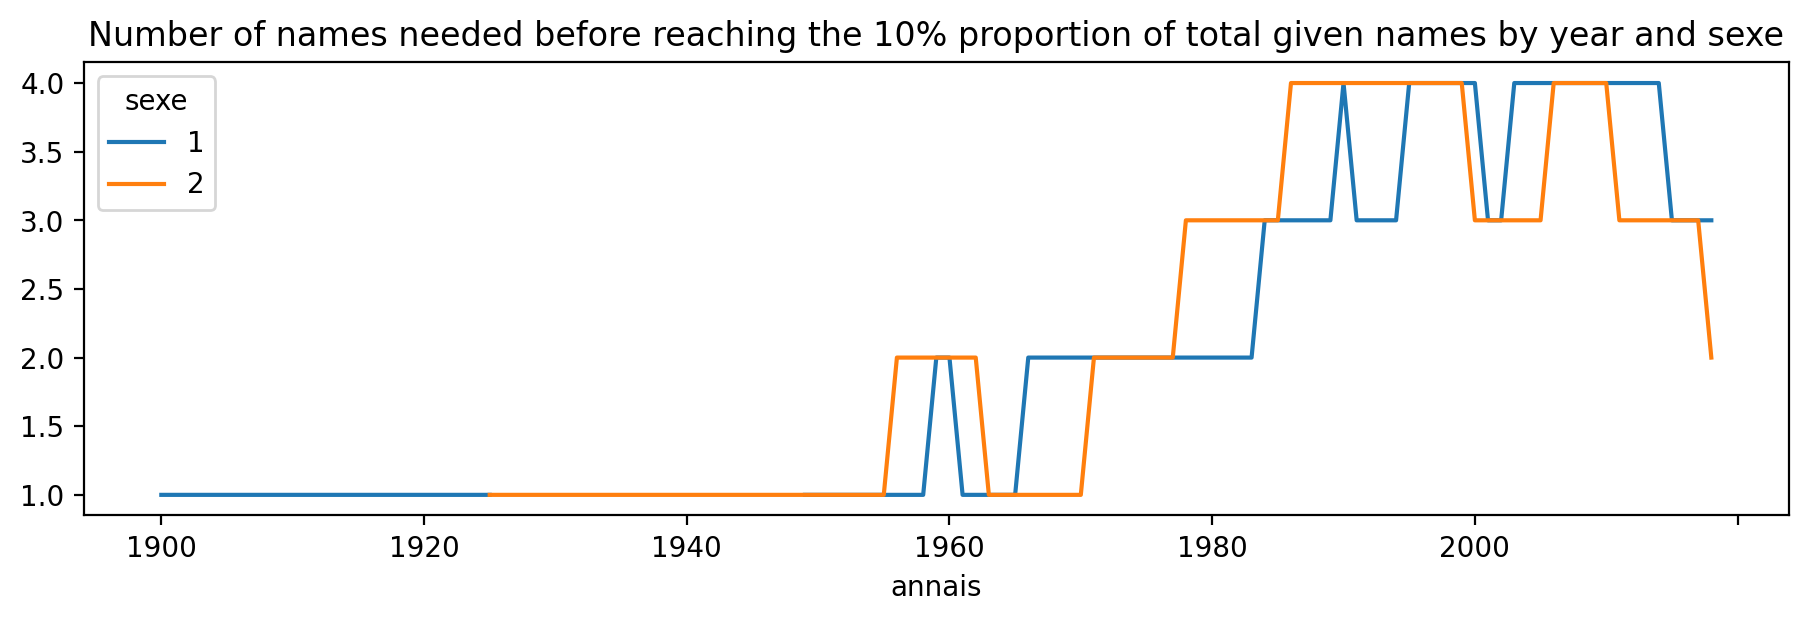

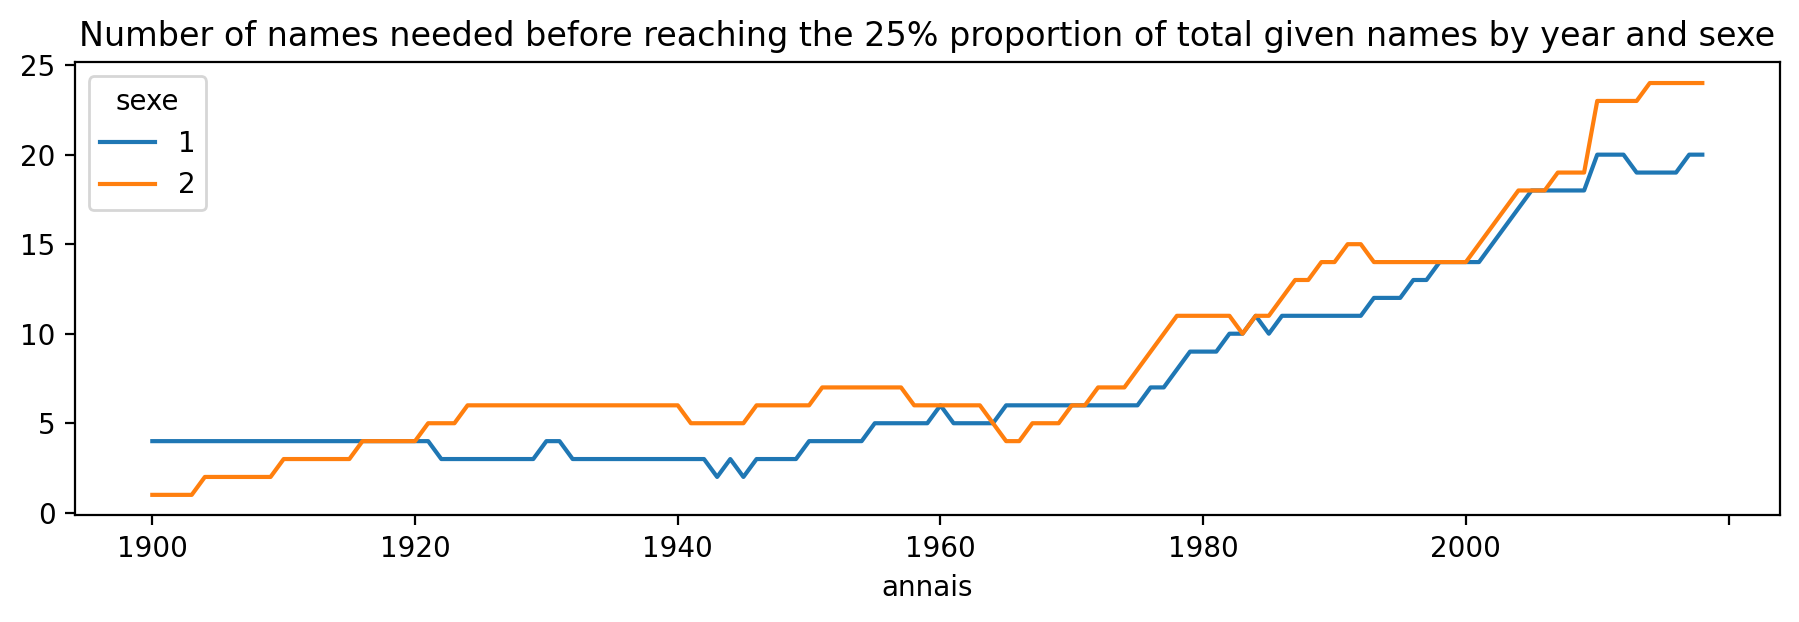

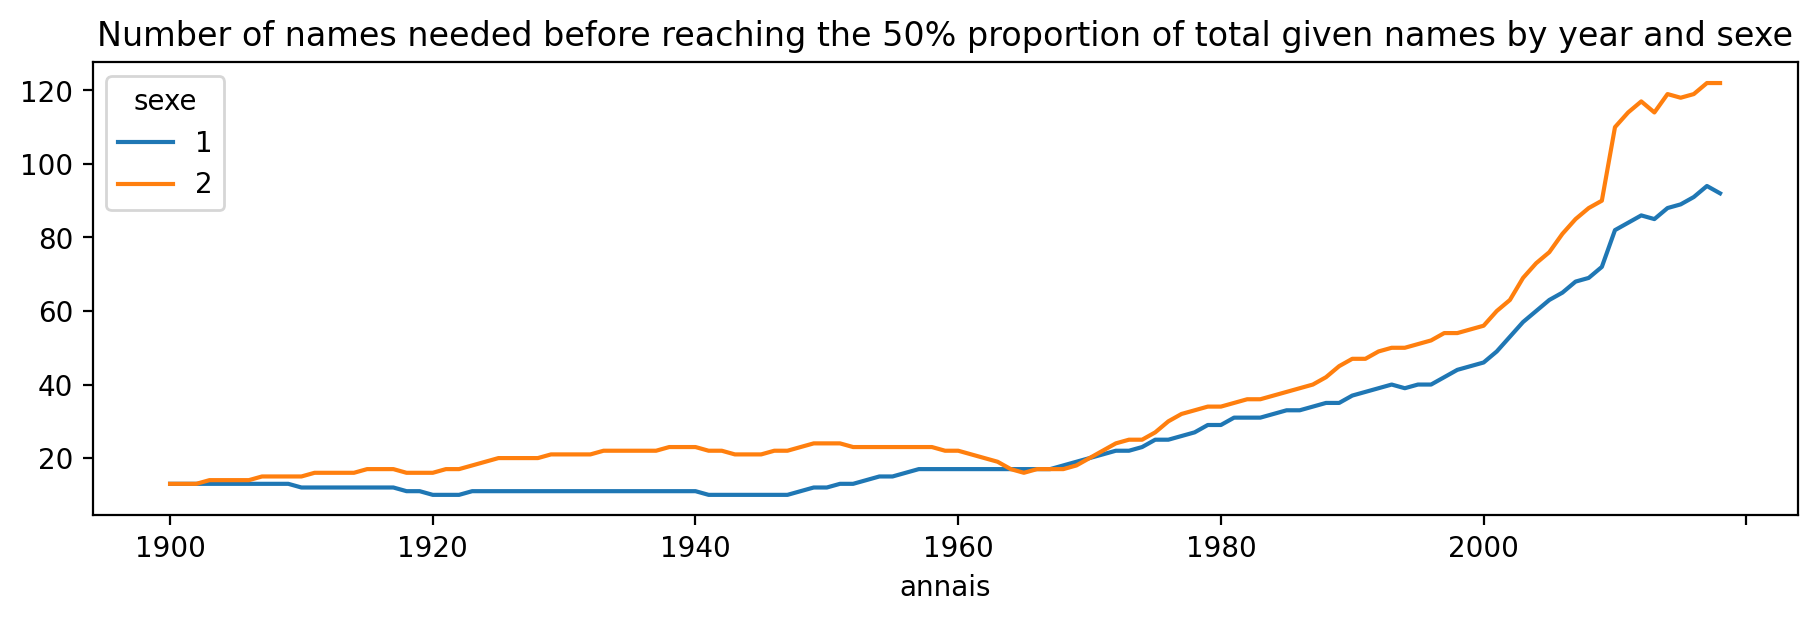

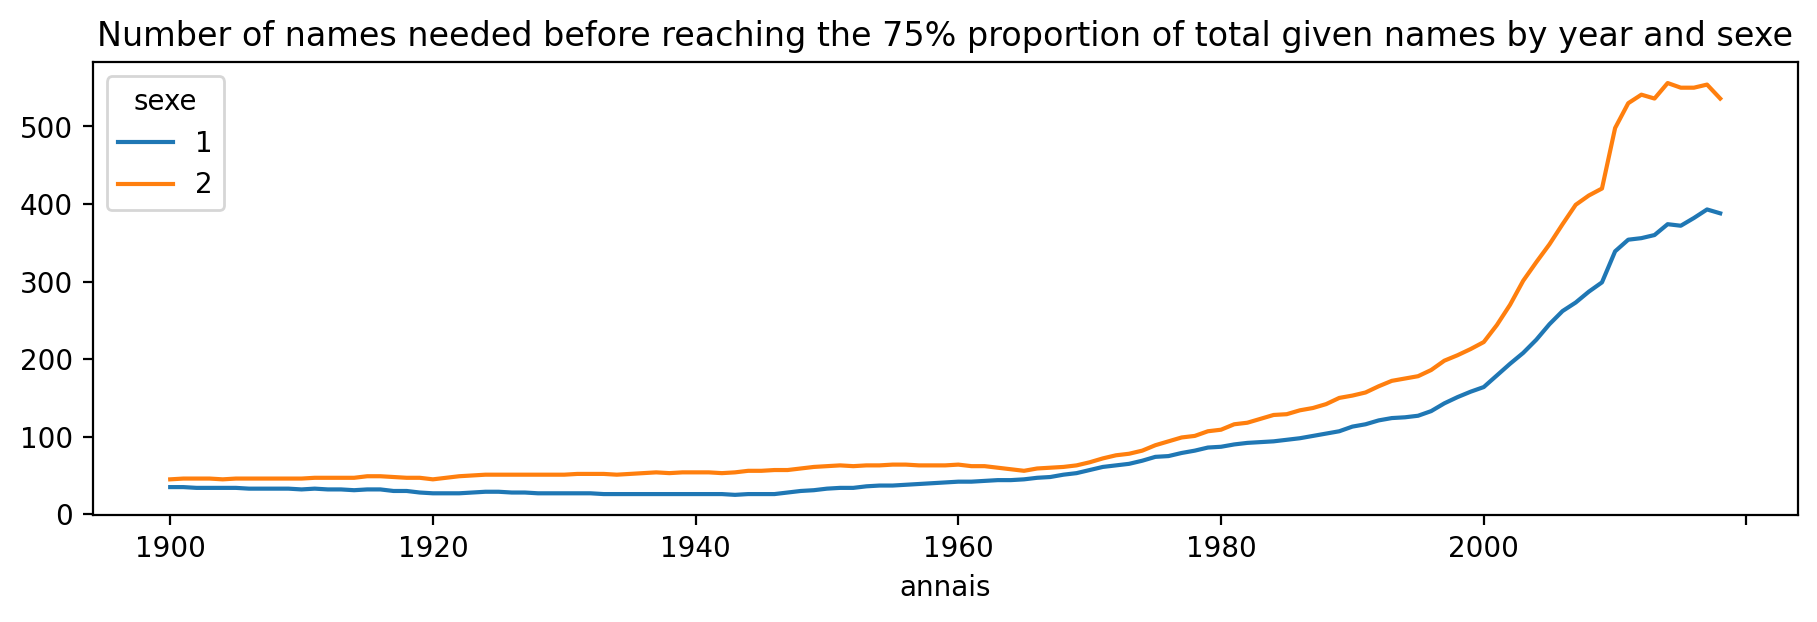

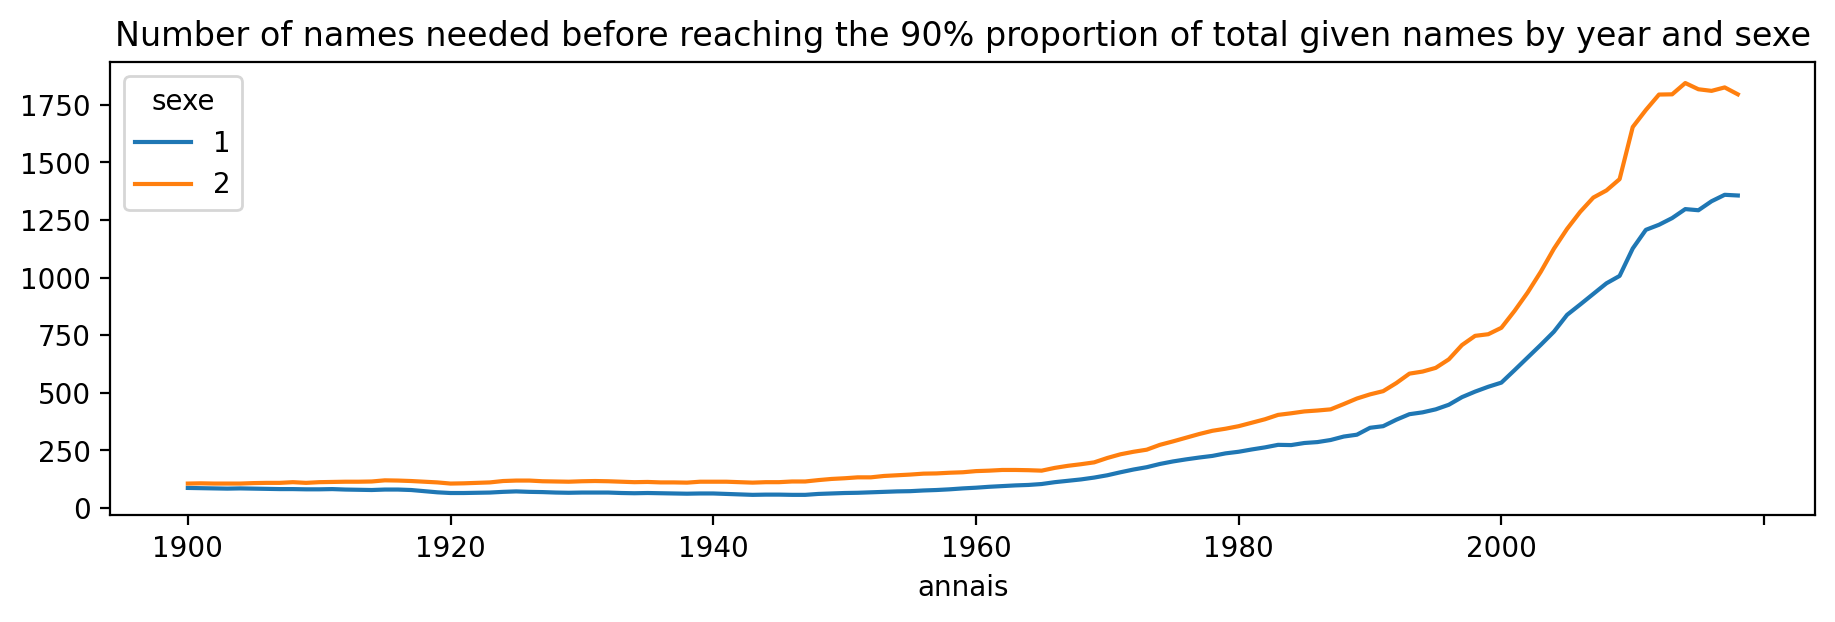

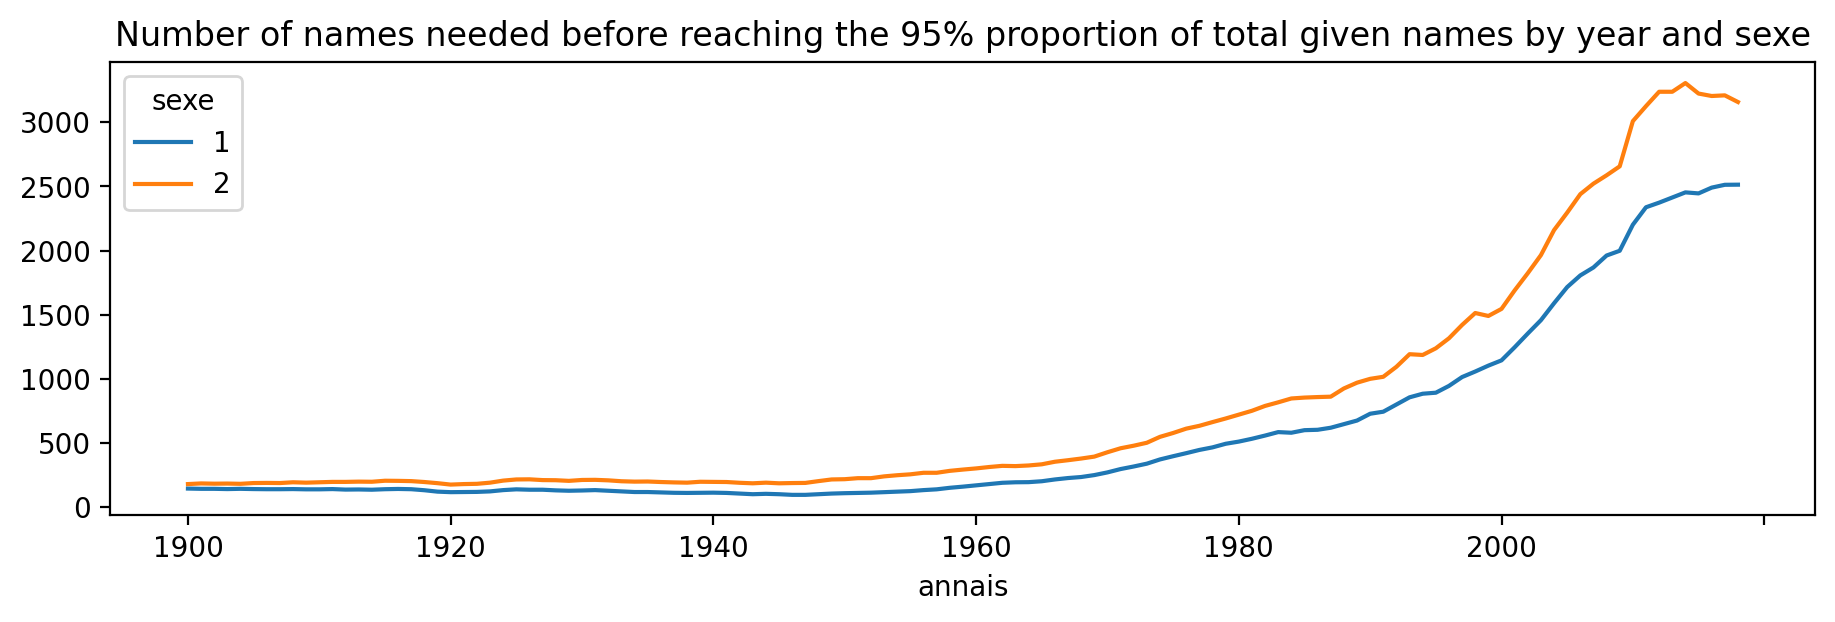

In [20]:

for ratio in [0.10, 0.25, 0.50, 0.75, 0.90, 0.95]:  
    plot_n_name_to_reach_ratio_of_given_names(nat, ratio=ratio, keep_rare=True)
